In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Simulating Microsoft Teams Data
np.random.seed(42)
n_users = 200

In [12]:
data = {
    "User ID": [f"User_{i}" for i in range(1, n_users + 1)],
    "Department": np.random.choice(["Engineering", "Marketing", "Sales", "HR", "Support"], n_users),
    "Role": np.random.choice(["Manager", "Individual Contributor"], n_users),
    "Messages Sent": np.random.randint(0, 500, n_users),
    "Calls Made": np.random.randint(0, 100, n_users),
    "Meetings Attended": np.random.randint(0, 50, n_users),
    "Active Days": np.random.randint(10, 30, n_users),
    "Total Time Spent (hrs)": np.random.randint(50, 300, n_users),
}

In [14]:
# Create DataFrame
df = pd.DataFrame(data)

In [16]:
df

,User ID,Department,Role,Messages Sent,Calls Made,Meetings Attended,Active Days,Total Time Spent (hrs)
0,User_1,HR,Individual Contributor,150,42,27,23,206
1,User_2,Support,Individual Contributor,449,11,35,11,96
2,User_3,Sales,Individual Contributor,126,66,25,22,117
3,User_4,Support,Manager,154,64,7,23,125
4,User_5,Support,Manager,489,32,49,28,222
...,...,...,...,...,...,...,...,...
195,User_196,Sales,Individual Contributor,379,71,34,22,136
196,User_197,Sales,Individual Contributor,32,75,14,29,104
197,User_198,Engineering,Individual Contributor,416,23,46,24,269
198,User_199,Support,Manager,444,27,21,17,81


In [18]:
# Overview
print("Dataset Overview:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

Dataset Overview:
   User ID Department                    Role  Messages Sent  Calls Made  \
0  User_1         HR  Individual Contributor            150          42   
1  User_2    Support  Individual Contributor            449          11   
2  User_3      Sales  Individual Contributor            126          66   
3  User_4    Support                 Manager            154          64   
4  User_5    Support                 Manager            489          32   

   Meetings Attended  Active Days  Total Time Spent (hrs)  
0                 27           23                     206  
1                 35           11                      96  
2                 25           22                     117  
3                  7           23                     125  
4                 49           28                     222  

Summary Statistics:
        Messages Sent  Calls Made  Meetings Attended  Active Days  \
count     200.000000  200.000000         200.000000   200.000000   
mean      25

In [20]:
# Handle missing values in numeric columns
df.fillna(df.select_dtypes(include='number').median(), inplace=True)

In [22]:
df

,User ID,Department,Role,Messages Sent,Calls Made,Meetings Attended,Active Days,Total Time Spent (hrs)
0,User_1,HR,Individual Contributor,150,42,27,23,206
1,User_2,Support,Individual Contributor,449,11,35,11,96
2,User_3,Sales,Individual Contributor,126,66,25,22,117
3,User_4,Support,Manager,154,64,7,23,125
4,User_5,Support,Manager,489,32,49,28,222
...,...,...,...,...,...,...,...,...
195,User_196,Sales,Individual Contributor,379,71,34,22,136
196,User_197,Sales,Individual Contributor,32,75,14,29,104
197,User_198,Engineering,Individual Contributor,416,23,46,24,269
198,User_199,Support,Manager,444,27,21,17,81


In [24]:
df.describe()

,Messages Sent,Calls Made,Meetings Attended,Active Days,Total Time Spent (hrs)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,255.370000,47.590000,23.925000,18.700000,173.465000
std,145.332311,29.127547,14.659944,5.773793,68.557563
min,0.000000,0.000000,0.000000,10.000000,50.000000
25%,127.500000,21.500000,12.000000,14.000000,112.000000
50%,256.500000,44.500000,25.000000,18.000000,176.500000
75%,380.000000,73.000000,35.000000,24.000000,228.000000
max,499.000000,99.000000,49.000000,29.000000,295.000000


In [26]:
# Visualization Setup
sns.set(style="whitegrid")

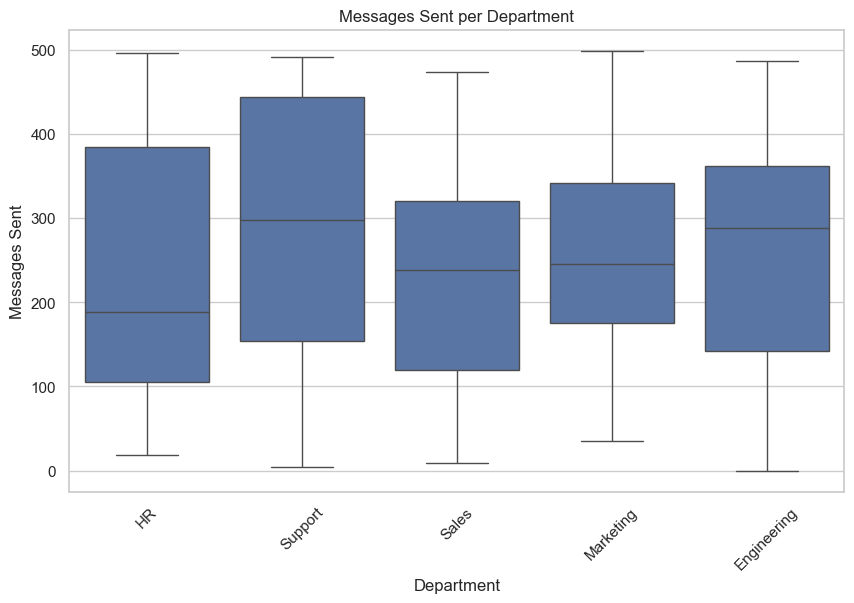

In [28]:
# 1. Messages Sent per Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Department", y="Messages Sent")
plt.title("Messages Sent per Department")
plt.xticks(rotation=45)
plt.show()

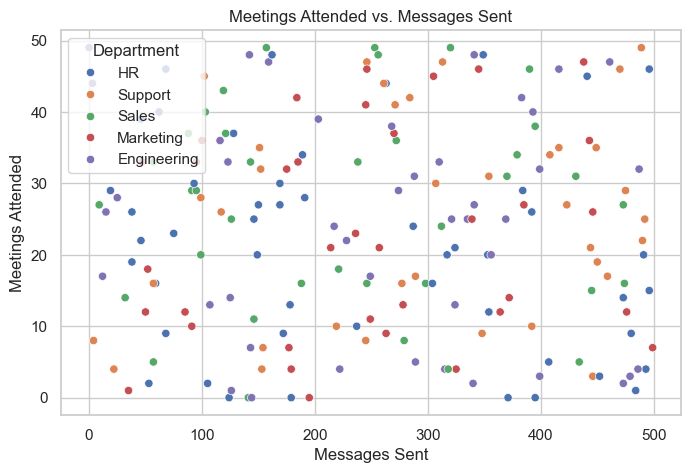

In [30]:
# 2. Meetings vs. Messages Sent
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Messages Sent", y="Meetings Attended", hue="Department")
plt.title("Meetings Attended vs. Messages Sent")
plt.show()

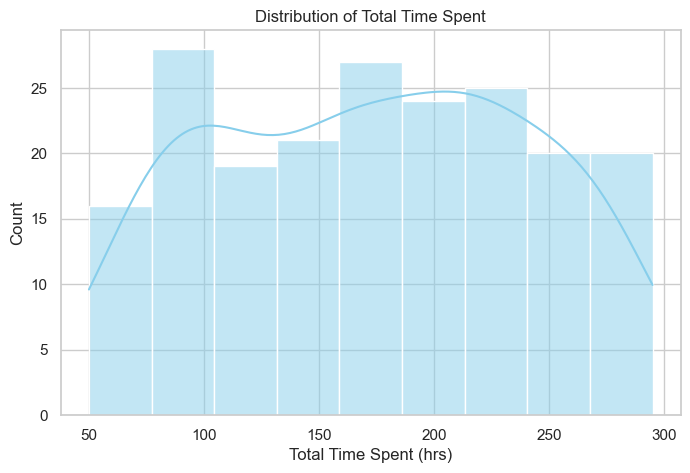

In [36]:
# 3. Distribution of Total Time Spent
plt.figure(figsize=(8, 5))
sns.histplot(df["Total Time Spent (hrs)"], kde=True, color='skyblue')
plt.title("Distribution of Total Time Spent")
plt.show()

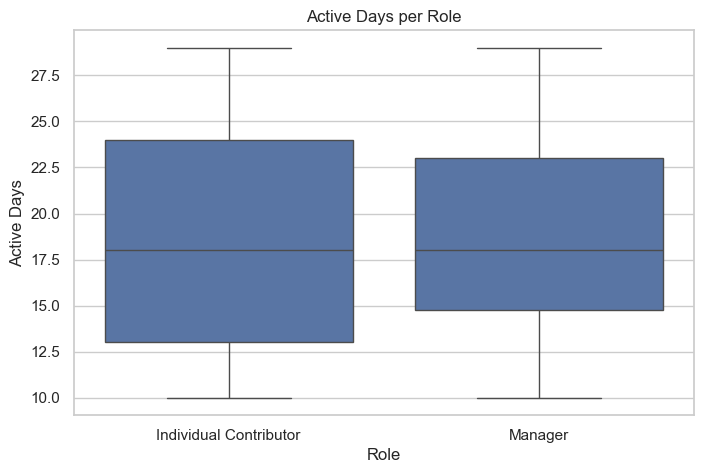

In [38]:
# 4. Active Days per Role
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Role", y="Active Days")
plt.title("Active Days per Role")
plt.show()

In [42]:
# Insights
correlation_matrix = df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

print("\nInsights:")
print("- Engineering has the highest message activity, potentially due to collaboration needs.")
print("- Messages Sent and Meetings Attended show no strong correlation — teams may rely more on chat.")
print("- Individual Contributors spend slightly less time in meetings than Managers.")


Correlation Matrix:
                         Messages Sent  Calls Made  Meetings Attended  \
Messages Sent                1.000000    0.014850          -0.014919   
Calls Made                   0.014850    1.000000          -0.072988   
Meetings Attended           -0.014919   -0.072988           1.000000   
Active Days                 -0.061478    0.034344          -0.022708   
Total Time Spent (hrs)       0.087705   -0.085881          -0.167411   

                        Active Days  Total Time Spent (hrs)  
Messages Sent             -0.061478                0.087705  
Calls Made                 0.034344               -0.085881  
Meetings Attended         -0.022708               -0.167411  
Active Days                1.000000               -0.006209  
Total Time Spent (hrs)    -0.006209                1.000000  

Insights:
- Engineering has the highest message activity, potentially due to collaboration needs.
- Messages Sent and Meetings Attended show no strong correlation — teams m